In [1]:
from gym_2048.envs.game2048_env import Game2048Env
from random import randint
import matplotlib.pyplot as plt
import numpy as np
import copy

In [2]:
def random_avg_generate(game, max_sims):
    score_per_move = []
    current_state = copy.deepcopy(game.Matrix)
    # print(current_state)
    
    for i in range(0,max_sims):
        s = 0
        dum_game = Game2048Env()
        # print(current_state)
        dum_game.set_board(copy.deepcopy(current_state))
        # rgb = dum_game.render(mode='rgb_array')
        # rgb = np.rot90(rgb, k=3)
        # rgb = np.fliplr(rgb)
        # plt.imshow(rgb)
        # plt.show()
        steps = 0
        while dum_game.isend() != True:
            try:
                m = randint(0,3)
                s += dum_game.move(m)
                dum_game.add_tile()
                steps +=1
            except:
                pass
        score_per_move.append(s/steps)
        # print(dum_game.Matrix)
    return(np.mean(score_per_move))

In [3]:
def best_move(game):
    current_state = copy.deepcopy(game.Matrix)
    score = [0,0,0,0]
    for m in range(0,4):
        dum_game = Game2048Env()
        dum_game.set_board(copy.deepcopy(current_state))
        try:
            score[m] += dum_game.move(m)
            dum_game.add_tile()
            score[m] += random_avg_generate(dum_game, max_sims=50)
        except:
            pass
    return(score)

In [4]:
    
game = Game2048Env()
while game.highest() != 2048:
    game.reset()
    images = []
    moves = []
    rgb_array = game.render(mode='rgb_array')
    rgb_array = np.rot90(rgb_array, k=3)
    rgb_array = np.fliplr(rgb_array)
    images.append(rgb_array)
    # plt.imshow(rgb_array)
    # plt.show()

    game_score = 0
    game_score_list = [0]
    while (game.isend() != True and game.highest()<2048):
        scores = best_move(game)
        m = scores.index(max(scores))
        # if m == 0:
        #     print("Moving Up")
        # elif m == 1:
        #     print("Moving Right")
        # elif m == 2:
        #     print("Moving Down")
        # elif m == 3:
        #     print("Moving Left")
        if m == 0:
            moves.append("Moving Up")
        elif m == 1:
            moves.append("Moving Right")
        elif m == 2:
            moves.append("Moving Down")
        elif m == 3:
            moves.append("Moving Left")
        game_score += game.move(m)
        game_score_list.append(game_score)
        game.add_tile()
        rgb_array = game.render(mode='rgb_array')
        rgb_array = np.rot90(rgb_array, k=3)
        rgb_array = np.fliplr(rgb_array)
        images.append(rgb_array)
        # plt.imshow(rgb_array)
        # plt.show()
    moves.append("Done")
    print(game.highest())


512
2048


In [ ]:
game_score_list = np.asarray(game_score_list)
np.savetxt('monte_carlo.csv', game_score_list, delimiter=',')

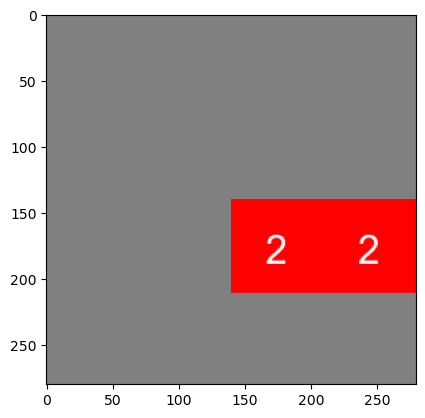

In [5]:
import matplotlib.animation as animation

fig, ax = plt.subplots()

def update(frame):
    ax.imshow(images[frame])
    return ax

anim = animation.FuncAnimation(fig, update, frames=len(images))

Writer = animation.writers['ffmpeg']
writer = Writer(fps=1, metadata=dict(artist='Me'), bitrate=1800)
anim.save('my_animation.mp4', writer=writer)

In [6]:
# # Make   each of the possible moves and simulate the rest of the game randomly for each
# scores = [0,0,0,0]
# max_moves = 10
# dum_game = Game2048Env()
# for move in range(0,4):
#     s = 0
#     dum_game.set_board(stored_state)
#     rgb_array = dum_game.render(mode='rgb_array')
#     rgb_array = np.rot90(rgb_array, k=3)
#     rgb_array = np.fliplr(rgb_array)
#     plt.imshow(rgb_array)
#     plt.show()

#     try:
#         s += dum_game.move(move)
#         dum_game.add_tile()
#         i = 0
#         while i < max_moves:
#             m = randint(0,3)
#             try:
#                 s += dum_game.move(m)
#                 dum_game.add_tile()
#                 i +=1
#             except:
#                 pass

#     except:
#         pass
#     scores[move] = s

# print(scores)


In [7]:
# rgb_array = game.render(mode='rgb_array')
# rgb_array = np.rot90(rgb_array, k=3)
# rgb_array = np.fliplr(rgb_array)
# plt.imshow(rgb_array)
# plt.show()

In [8]:
# def get_next_best_move(game,scores):
#     max_moves = 10
#     dum_game = Game2048Env()
#     for move in range(0,4):
#         s = 0
#         dum_game.set_board(game.Matrix)
#         rgb = dum_game.render(mode = 'rgb_array')
#         plt.imshow(rgb)
#         plt.show()

#         try:
#             s += dum_game.move(move)
#             dum_game.add_tile()
#             i = 0
#             while i < max_moves:
#                 m = randint(0,3)
#                 try:
#                     s += dum_game.move(m)
#                     dum_game.add_tile()
#                     i +=1
#                 except:
#                     pass

#         except:
#             pass
#         scores[move] = s
#     return(scores)